##**David Alejandro Vásquez Franco**

##**CC 1000921301**

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_06_ClasificacionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$


Estrategia de solución.

1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset
```
print(iris.DESCR)
```
2. Construye un dataframe:
- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.


3. Cambia el nombre de las columnas del dataframe, empleando intrucción como:
```
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
```


4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.

5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion


6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.


7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:
```
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```
¿Cómo se estan seprando los datos?


8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.


9. Determine  la frontera de clasificación:
```
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary
```


10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad


11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.


12. Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?




Ayudas para mejorar las metricas:


- Normalizar cada columna respecto a su media y desviacion estandar

```
(x-mean(x))/std(x)
```

- Determinar los datos outlier

- Construir curvas de aprendizaje

# [SOFTMAX REGRESION](https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax)


La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida es mostrada a continuación.

[Referencias]  [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)


# Reto, no es obligatorio.

### Clasificación de pulsar.

Para el siguiente  dataset descrito en el este enlace [pulsar](https://archive.ics.uci.edu/ml/datasets/HTRU2)  , construir un clasificador logístico, para ello, deberá primera entender las caracteristicas del problema y seguidamente estudiar el comportamiento de la clasificacion realizada.


1. Dividir los datos en train and test
2. Entrenar el algoritmo.
3. Analizar las curvas de aprendizaje.
4. Realizar Predicciones
5. Aplicar regularización.


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html

****

# **Solución**

## **1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [18]:
# Cargamos el dataset
iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## **2. Construye un dataframe**

In [19]:
# Creamos el DataFrame con los datos (X) y nombres de columnas
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Agregamos la columna objetivo (target)
df['target'] = iris.target

print(f"Dimensiones del DataFrame: {df.shape}")

df.head()

Dimensiones del DataFrame: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **3. Cambia el nombre de las columnas del dataframe, empleando instrucción**

In [20]:
# Obtenemos los nombres actuales de las columnas
original_cols = df.columns

# Capitalizamos
columns_name = ["".join([c.capitalize() for c in cols.split()]) for cols in original_cols]

# Reemplazamos paréntesis de apertura por guion bajo
columns_name = [col.replace("(", "_") for col in columns_name]

# Quitamos paréntesis de cierre
final_cols = [col.replace(")", "") for col in columns_name]

# Asignamos los nuevos nombres al DataFrame
df.columns = final_cols

print("Nuevos nombres de columnas:")
print(df.columns.tolist())
df.head()

Nuevos nombres de columnas:
['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm', 'Target']


,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.**

In [21]:
# 1. Información General
print("--- Información General (Info) ---")
print(df.info())

# 2. Conteo de Nulos
print("\n--- Conteo de Valores Nulos ---")
print(df.isnull().sum())

# 3. Estadísticas Descriptivas (Media, desviación, mínimos y máximos)
print("\n--- Descripción Estadística ---")
display(df.describe())

--- Información General (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLength_cm  150 non-null    float64
 1   SepalWidth_cm   150 non-null    float64
 2   PetalLength_cm  150 non-null    float64
 3   PetalWidth_cm   150 non-null    float64
 4   Target          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

--- Conteo de Valores Nulos ---
SepalLength_cm    0
SepalWidth_cm     0
PetalLength_cm    0
PetalWidth_cm     0
Target            0
dtype: int64

--- Descripción Estadística ---


,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## **5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion**

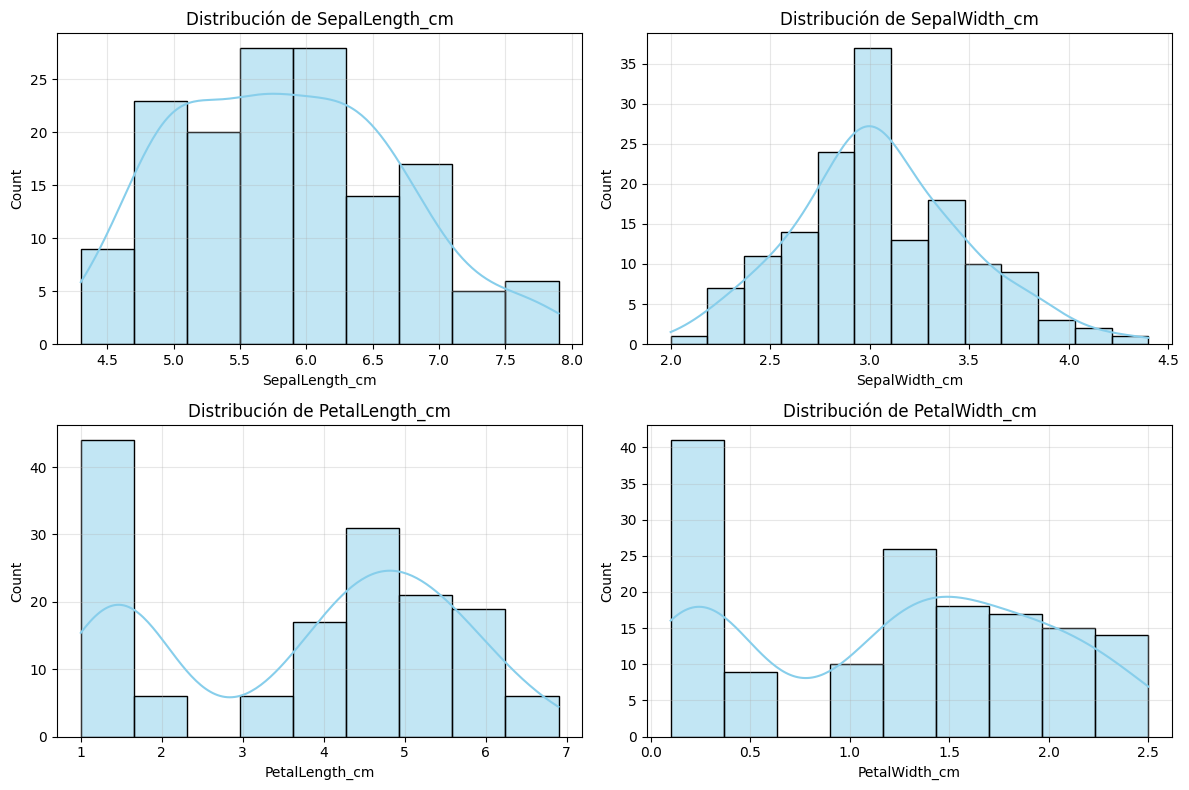

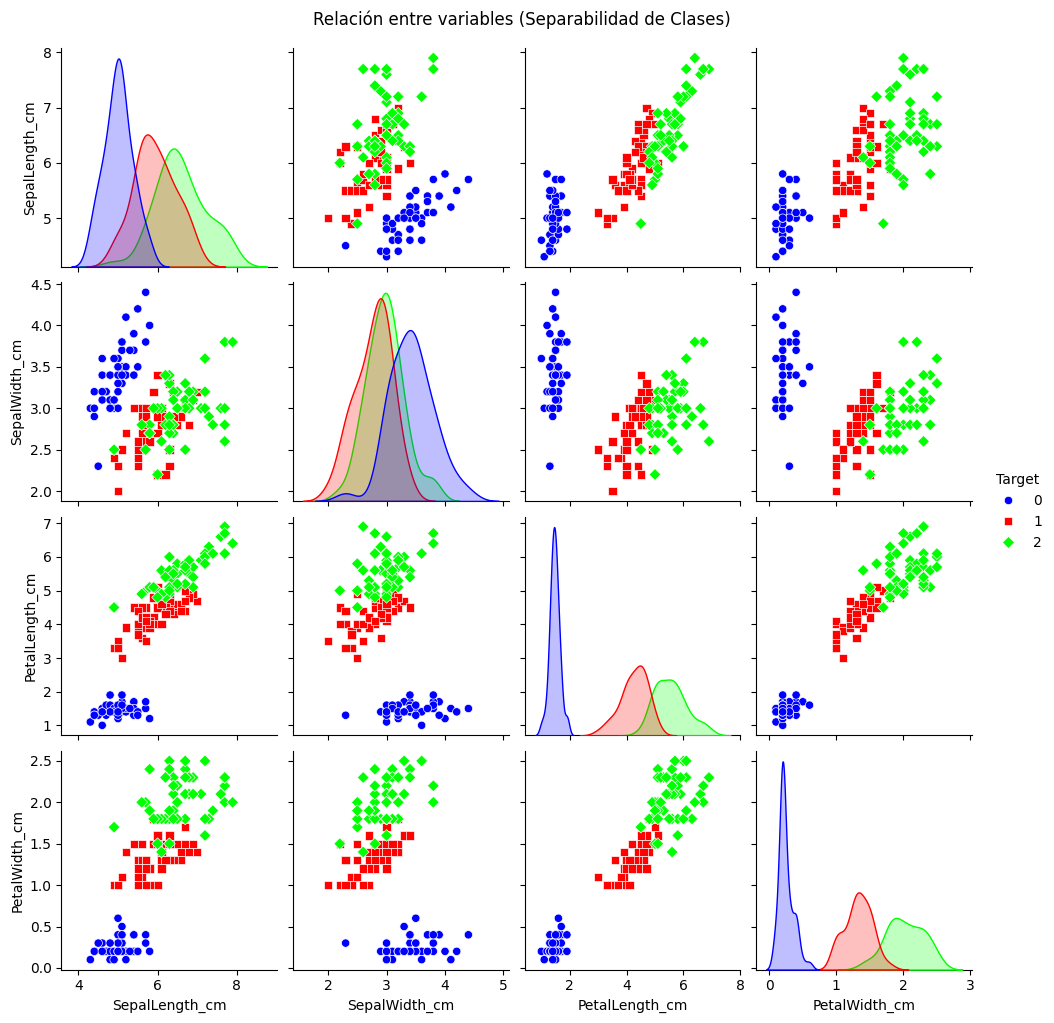


--- Matriz de Correlación ---


,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm
SepalLength_cm,1.000000,-0.117570,0.871754,0.817941
SepalWidth_cm,-0.117570,1.000000,-0.428440,-0.366126
PetalLength_cm,0.871754,-0.428440,1.000000,0.962865
PetalWidth_cm,0.817941,-0.366126,0.962865,1.000000


In [22]:
# Histogramas Individuales (Para ver la forma de los datos)
features = df.columns[:-1]

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico de Pares (Pairplot)
sns.pairplot(df, hue='Target', palette='brg', markers=["o", "s", "D"])
plt.suptitle("Relación entre variables (Separabilidad de Clases)", y=1.02)
plt.show()

# Matriz de Correlación (Numérica)
print("\n--- Matriz de Correlación ---")
# Calculamos la correlación solo de las variables numéricas
correlation_matrix = df[features].corr()
display(correlation_matrix)

/tmp/ipython-input-587384615.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Target', y=col, palette='viridis', inner='quart')
/tmp/ipython-input-587384615.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Target', y=col, palette='viridis', inner='quart')
/tmp/ipython-input-587384615.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Target', y=col, palette='viridis', inner='quart')
/tmp/ipython-input-587384615.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

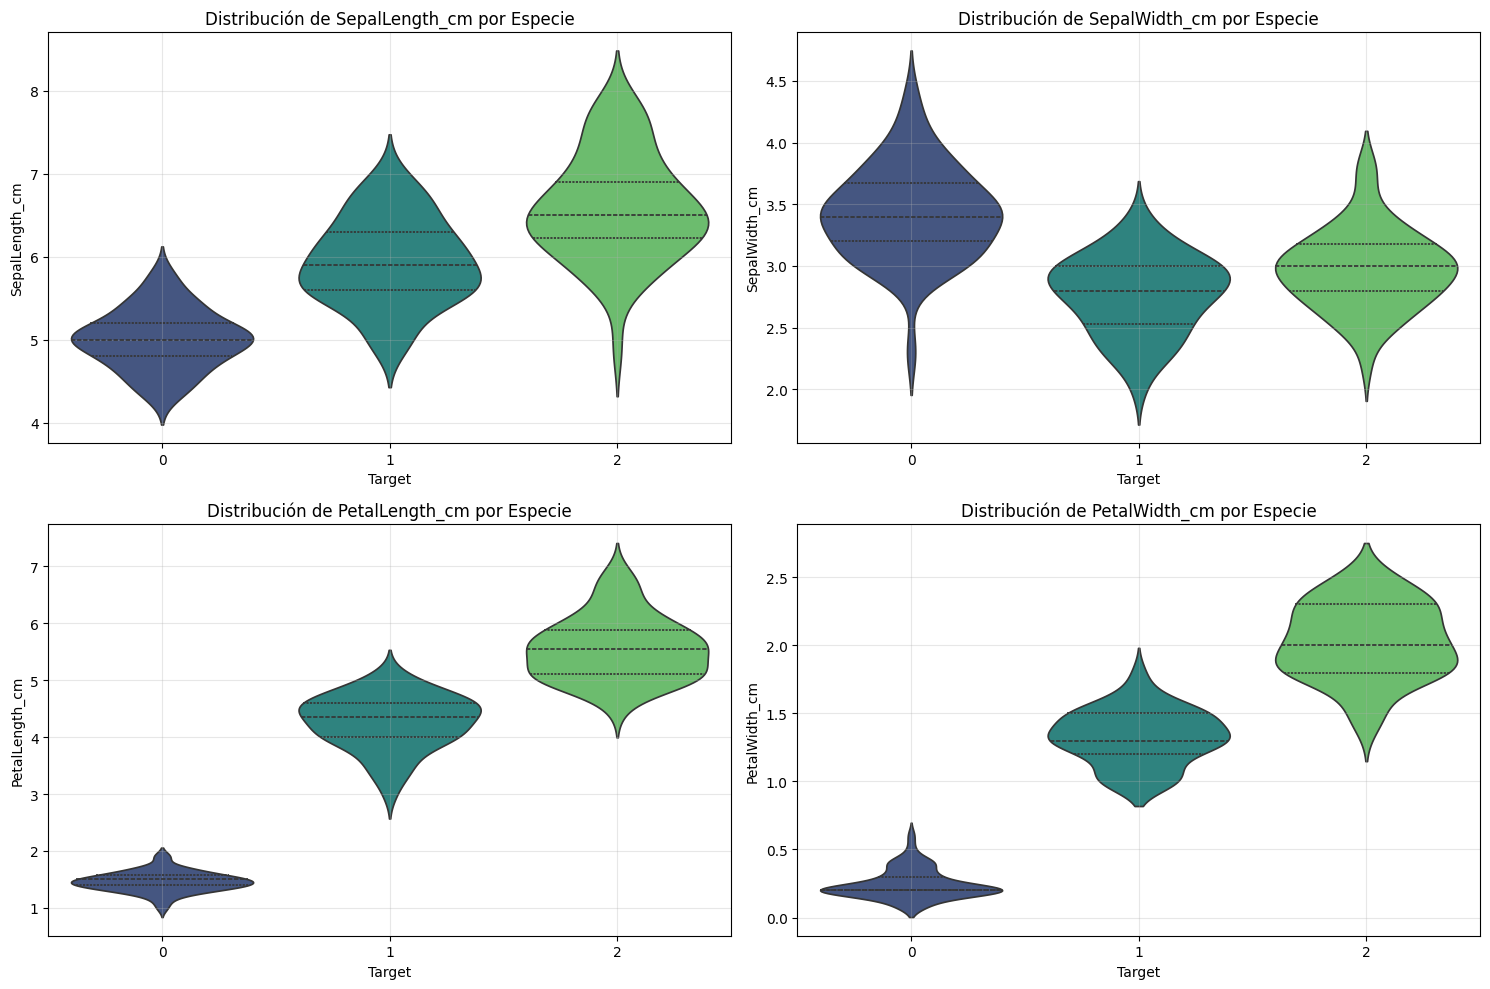

In [23]:
features_num = ['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm']

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(15, 10))

for i, col in enumerate(features_num, 1):
    plt.subplot(2, 2, i)
    # inner='quart' dibuja líneas en los cuartiles (25%, 50%, 75%)
    sns.violinplot(data=df, x='Target', y=col, palette='viridis', inner='quart')
    plt.title(f"Distribución de {col} por Especie")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.**

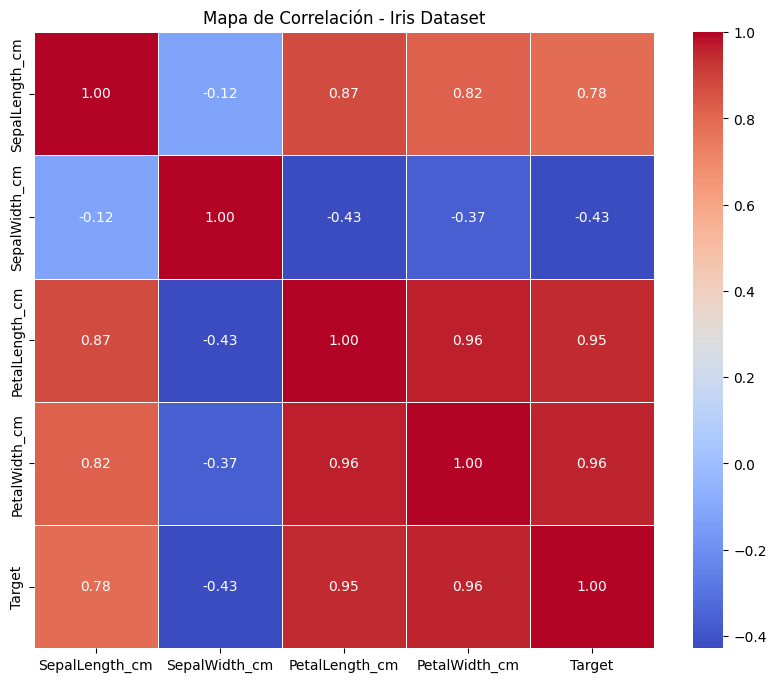

In [24]:
# Calculamos la matriz de correlación (Solo variables numéricas)
cols_numericas = ['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm', 'Target']
correlation_matrix = df[cols_numericas].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Correlación - Iris Dataset")
plt.show()

## **7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion: [...] ¿Cómo se estan separando los datos?**

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

# Inicializamos el separador estratificado
# n_splits=1: Solo queremos una división (Train/Test)
# test_size=0.2: 20% para pruebas (30 flores), 80% para entrenar (120 flores)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Ejecutamos la división basada en la columna 'Target'
for train_index, test_index in split.split(df, df["Target"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Verificamos los tamaños
print(f"Entrenamiento: {len(strat_train_set)} muestras")
print(f"Prueba: {len(strat_test_set)} muestras")

# VERIFICACIÓN DE LA ESTRATEGIA
print("\n--- Proporción de Clases en Train ---")
print(strat_train_set["Target"].value_counts(normalize=True))

print("\n--- Proporción de Clases en Test ---")
print(strat_test_set["Target"].value_counts(normalize=True))

Entrenamiento: 120 muestras
Prueba: 30 muestras

--- Proporción de Clases en Train ---
Target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

--- Proporción de Clases en Test ---
Target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64


In [27]:
strat_train_set

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
8,4.4,2.9,1.4,0.2,0
106,4.9,2.5,4.5,1.7,2
76,6.8,2.8,4.8,1.4,1
9,4.9,3.1,1.5,0.1,0
89,5.5,2.5,4.0,1.3,1
...,...,...,...,...,...
37,4.9,3.6,1.4,0.1,0
2,4.7,3.2,1.3,0.2,0
33,5.5,4.2,1.4,0.2,0
52,6.9,3.1,4.9,1.5,1


In [28]:
strat_test_set

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
38,4.4,3.0,1.3,0.2,0
127,6.1,3.0,4.9,1.8,2
57,4.9,2.4,3.3,1.0,1
93,5.0,2.3,3.3,1.0,1
42,4.4,3.2,1.3,0.2,0
56,6.3,3.3,4.7,1.6,1
22,4.6,3.6,1.0,0.2,0
20,5.4,3.4,1.7,0.2,0
147,6.5,3.0,5.2,2.0,2
84,5.4,3.0,4.5,1.5,1


## **8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.**

In [29]:
from sklearn.linear_model import LogisticRegression

# Preparamos las variables (X e Y) desde el set de entrenamiento
# Quitamos la columna 'target' para tener solo las medidas
X_train = strat_train_set.drop("Target", axis=1)
y_original = strat_train_set["Target"]

# Transformación Binaria
# Si la flor es Setosa (clase 0), y!=0 es Falso (0).
# Si es Versicolor (1) o Virginica (2), y!=0 es Verdadero (1).
y_train_binario = (y_original != 0).astype(int)

#  Construcción y Entrenamiento del Modelo
log_reg = LogisticRegression(solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train_binario)

print(f"Clases del modelo: {log_reg.classes_} donde 0=Setosa, 1=Otros")
# Vemos los coeficientes para ver qué variables pesan más
print("\nCoeficientes (Pesos w):", log_reg.coef_)
print("Intercepto (Bias b):", log_reg.intercept_)

Clases del modelo: [0 1] donde 0=Setosa, 1=Otros

Coeficientes (Pesos w): [[ 0.53728064 -0.78745033  2.20401347  0.91811203]]
Intercepto (Bias b): [-7.22480509]


## **9. Determine la frontera de clasificación: ..." (y muestra un código sugerido con linspace)**

In [31]:
# Preparamos datos simplificados (1 sola característica)
# Usamos .values.reshape(-1, 1) porque sklearn espera una matriz 2D, no un vector
X_simple = strat_train_set[["PetalWidth_cm"]].values
y_simple = (strat_train_set["Target"] == 0).astype(int) # 1 si es Setosa, 0 si no

# Entrenamos un nuevo modelo logístico específico para esta variable
log_reg_simple = LogisticRegression(solver='lbfgs')
log_reg_simple.fit(X_simple, y_simple)

# Generamos datos ficticios para barrer todo el rango posible
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# Predecimos probabilidades para todos esos puntos
y_proba = log_reg_simple.predict_proba(X_new)

# Buscamos el primer punto donde la probabilidad de ser Setosa (columna 1) baja del 50%
# O dicho de otra forma, donde la probabilidad de NO ser Setosa (columna 0) sube del 50%
decision_boundary = X_new[y_proba[:, 1] >= 0.5][-1] # Tomamos el último punto donde aún es > 50%

print(f"La frontera de decisión está en: {decision_boundary[0]:.3f} cm")

La frontera de decisión está en: 0.760 cm


## **10. Encontrar una gráfica de la regresión logística con los valores de probabilidad**

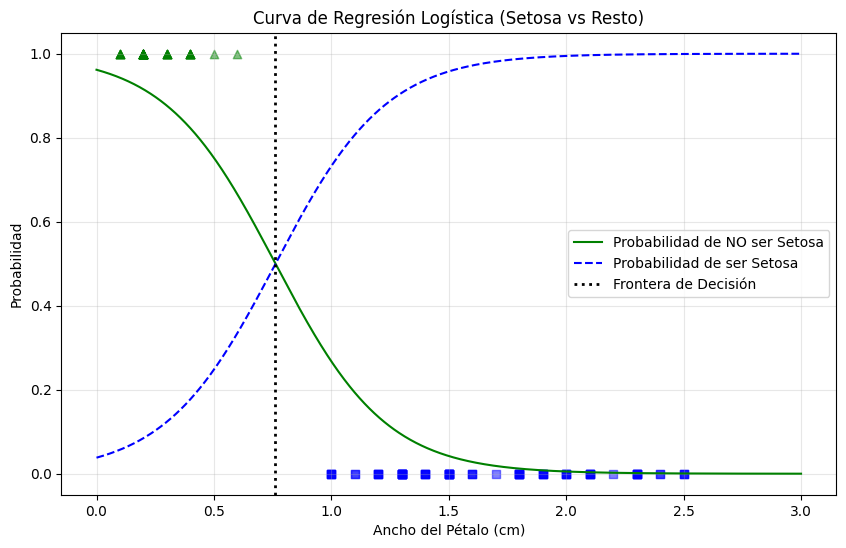

In [32]:
# prob[:, 1] es la probabilidad de "NO ser Setosa" (Clase 1)
# prob[:, 0] es la probabilidad de "SER Setosa" (Clase 0)
plt.figure(figsize=(10, 6))

# Dibujamos la curva de probabilidad de la clase "No Setosa" (Verde)
plt.plot(X_new, y_proba[:, 1], "g-", label="Probabilidad de NO ser Setosa")

# Dibujamos la curva de probabilidad de la clase "Setosa" (Azul punteada)
plt.plot(X_new, y_proba[:, 0], "b--", label="Probabilidad de ser Setosa")

# Dibujamos la Frontera de Decisión (Línea negra vertical)
# Usamos el valor calculado en el punto 9 (aprox 0.76 cm)
plt.axvline(x=decision_boundary, color='k', linestyle=':', linewidth=2, label="Frontera de Decisión")

plt.xlabel("Ancho del Pétalo (cm)")
plt.ylabel("Probabilidad")
plt.legend(loc="center right")
plt.title("Curva de Regresión Logística (Setosa vs Resto)")
plt.grid(True, alpha=0.3)

# Mostramos dónde están los datos reales (puntos abajo y arriba)
plt.scatter(X_simple[y_simple==0], y_simple[y_simple==0], color='b', marker='s', alpha=0.5)
plt.scatter(X_simple[y_simple==1], y_simple[y_simple==1], color='g', marker='^', alpha=0.5)

plt.show()

## **11. Construye el multiclasificador. Puede emplear los métodos dentro de logistic regression.**

In [33]:
# Usamos el set estratificado que creamos en el Punto 7
X_train_multi = strat_train_set.drop("Target", axis=1)
y_train_multi = strat_train_set["Target"]  # Aquí están las clases 0, 1 y 2

# multi_class='multinomial': Le dice explícitamente que use Softmax (probabilidades para varias clases)
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42)

#  Entrenamos
softmax_reg.fit(X_train_multi, y_train_multi)

print(f"Clases detectadas: {softmax_reg.classes_} (0=Setosa, 1=Versicolor, 2=Virginica)")

# Verificamos
accuracy = softmax_reg.score(X_train_multi, y_train_multi)
print(f"Exactitud (Accuracy) en entrenamiento: {accuracy:.4f} ({accuracy*100}%)")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Clases detectadas: [0 1 2] (0=Setosa, 1=Versicolor, 2=Virginica)
Exactitud (Accuracy) en entrenamiento: 0.9750 (97.5%)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **12. Dado X = [4.9, 5.0, 1.8, 0.3] asociados a todas las características, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?**

In [34]:
# Definimos la nueva flor
nueva_flor = np.array([[4.9, 5.0, 1.8, 0.3]])

# predict_proba devuelve una lista de probabilidades, una para cada clase
probabilidades = softmax_reg.predict_proba(nueva_flor)

# Predecimos la clase final
prediccion = softmax_reg.predict(nueva_flor)

# Resultados
nombres_clases = ['Setosa', 'Versicolor', 'Virginica']

print(f"Flor analizada: {nueva_flor[0]}")
print("\n--- Probabilidades estimadas ---")
for i, nombre in enumerate(nombres_clases):
    print(f"{nombre}: {probabilidades[0][i]*100:.2f}%")

print(f"\n Predicción Final: Es una {nombres_clases[prediccion[0]]}")

Flor analizada: [4.9 5.  1.8 0.3]

--- Probabilidades estimadas ---
Setosa: 99.93%
Versicolor: 0.07%
Virginica: 0.00%

 Predicción Final: Es una Setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
